In [1]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
import seaborn as sns
from skfuzzy import control

In [2]:
open_time = control.Antecedent(np.arange(10, 51, 1), 'open time')
NS_cars = control.Antecedent(np.arange(0, 91, 1), 'NS cars')
WE_cars = control.Antecedent(np.arange(0, 91, 1), 'WE cars')
change_time = control.Consequent(np.arange(-20, 21, 1), 'change time')

In [3]:
open_time['s'] = fuzz.trapmf(open_time.universe, [10, 10, 20, 25])
open_time['m'] = fuzz.trapmf(open_time.universe, [20, 25, 35, 40])
open_time['l'] = fuzz.trapmf(open_time.universe, [35, 40, 50, 50])

NS_cars['xs'] = fuzz.trapmf(NS_cars.universe, [0, 0, 12, 18])
NS_cars['s'] = fuzz.trapmf(NS_cars.universe, [15, 21, 31, 37])
NS_cars['m'] = fuzz.trapmf(NS_cars.universe, [34, 40, 50, 56])
NS_cars['l'] = fuzz.trapmf(NS_cars.universe, [53, 59, 69, 75])
NS_cars['xl'] = fuzz.trapmf(NS_cars.universe, [72, 78, 90, 90])

WE_cars['xs'] = fuzz.trapmf(WE_cars.universe, [0, 0, 12, 18])
WE_cars['s'] = fuzz.trapmf(WE_cars.universe, [15, 21, 31, 37])
WE_cars['m'] = fuzz.trapmf(WE_cars.universe, [34, 40, 50, 56])
WE_cars['l'] = fuzz.trapmf(WE_cars.universe, [53, 59, 69, 75])
WE_cars['xl'] = fuzz.trapmf(WE_cars.universe, [72, 78, 90, 90])

change_time['s'] = fuzz.gaussmf(change_time.universe, 20, 7)
change_time['m'] = fuzz.gaussmf(change_time.universe, 0, 7)
change_time['l'] = fuzz.gaussmf(change_time.universe, -20, 7)

In [4]:
def parse_matlab_list(fpath):
    times = ['s', 'm', 'l']
    cars = ['xs', 's', 'm', 'l', 'xl']
    with open(fpath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        lines = [[int(i) - 1 for i in line.split()[:4]] for line in lines]
        for line in lines:
            print(
                f"control.Rule(open_time['{times[line[0]]}'] & NS_cars['{cars[line[1]]}'] & WE_cars['{cars[line[2]]}'], change_time['{times[line[3]]}']),")


parse_matlab_list('matlab.txt')

control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['xs'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['s'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['m'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['l'], change_time['m']),
control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['xl'], change_time['m']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['xs'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['s'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['m'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['l'], change_time['m']),
control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['xl'], change_time['m']),
control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['xs'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['s'], change_time['s']),
control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['

In [5]:
cs = control.ControlSystem([
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['l'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['xs'] & WE_cars['xl'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['l'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['s'] & WE_cars['xl'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['l'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['m'] & WE_cars['xl'], change_time['m']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['l'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['l'] & WE_cars['xl'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['l'], change_time['s']),
    control.Rule(open_time['s'] & NS_cars['xl'] & WE_cars['xl'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['xs'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['s'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['xs'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['s'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['s'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['m'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['m'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['l'], change_time['m']),
    control.Rule(open_time['m'] & NS_cars['l'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['xs'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['s'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['m'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['l'], change_time['s']),
    control.Rule(open_time['m'] & NS_cars['xl'] & WE_cars['xl'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['xs'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['s'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xs'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['xs'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['s'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['s'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['xs'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['s'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['m'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['m'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['xs'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['s'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['m'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['l'] & WE_cars['xl'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['xs'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['s'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['m'], change_time['m']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['l'], change_time['l']),
    control.Rule(open_time['l'] & NS_cars['xl'] & WE_cars['xl'], change_time['l'])
])

sim = control.ControlSystemSimulation(cs)

In [7]:
sim.input['open time'] = 1
sim.input['NS cars'] = 10
sim.input['WE cars'] = 1

sim.compute()
sim.output['change time']

14.405319578804047

In [8]:
def recompute(open_time, NS, WE) -> float:
    sim.input['open time'] = open_time
    sim.input['NS cars'] = NS
    sim.input['WE cars'] = WE
    sim.compute()
    return sim.output['change time']

In [16]:
def simulate(open_time, NS, WE, count=100, seed=0, fuzzy=False):
    np.random.seed(seed)

    time_waits = []
    # cars_amount = []
    for i in range(count):
        cars_to_pass = int(np.sqrt(open_time / np.random.random() * 0.6))
        NS = max(0, NS - cars_to_pass)
        WE = max(0, WE - cars_to_pass)
    
        time_waits.append((NS + WE) * open_time)
        # cars_amount.append((NS, WE))

        NS += np.random.randint(5, 30)
        WE += np.random.randint(5, 30)
    
        if fuzzy:
            open_time += recompute(open_time, NS, WE)
    
    return np.array(time_waits, dtype=float)

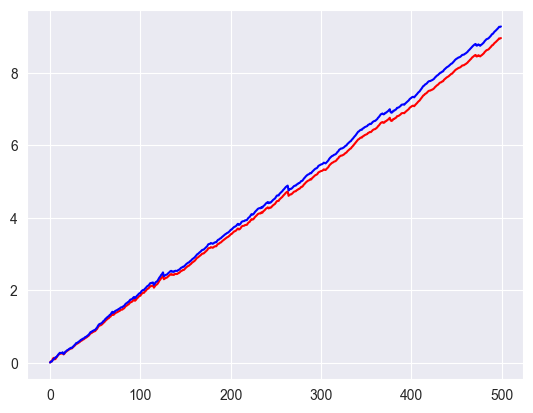

In [21]:
sim_amount = 500
seed = 0
_open = 30
_NS = 10
_WE = 10

time_waits_fuzzy = simulate(_open, _NS, _WE, count=sim_amount, seed=seed, fuzzy=True)
time_waits_normal = simulate(_open, _NS, _WE, count=sim_amount, seed=seed, fuzzy=False)

plt.plot(time_waits_fuzzy / sim_amount / 60, color='red')
plt.plot(time_waits_normal / sim_amount / 60, color='blue')
plt.show()

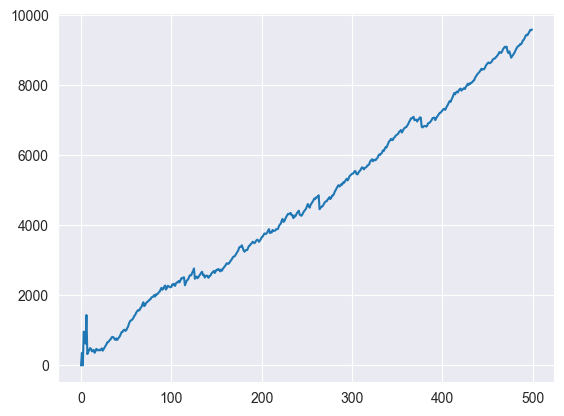

In [23]:
plt.plot(np.abs(time_waits_fuzzy - time_waits_normal))

In [20]:
time_waits_fuzzy

array([3.00000000e+02, 1.28775427e+03, 1.17483692e+03, 3.24522700e+03,
       4.09999801e+03, 2.88726970e+03, 3.14910017e+03, 4.35451167e+03,
       5.40072551e+03, 6.30555910e+03, 7.12556455e+03, 7.86074184e+03,
       7.60625739e+03, 7.83246579e+03, 8.28488259e+03, 6.92763220e+03,
       7.66280949e+03, 8.76557543e+03, 9.24626828e+03, 1.00097216e+04,
       1.03490342e+04, 1.09993834e+04, 1.13952481e+04, 1.19607691e+04,
       1.18476649e+04, 1.25545661e+04, 1.32897434e+04, 1.39400925e+04,
       1.47318219e+04, 1.57214837e+04, 1.58063118e+04, 1.63435568e+04,
       1.69090778e+04, 1.73049425e+04, 1.81532240e+04, 1.83228803e+04,
       1.90863336e+04, 1.93125420e+04, 1.98497869e+04, 2.05566882e+04,
       2.08394487e+04, 2.14332457e+04, 2.19422146e+04, 2.25925638e+04,
       2.35256734e+04, 2.45718873e+04, 2.46001633e+04, 2.53353406e+04,
       2.56181011e+04, 2.60987939e+04, 2.62684502e+04, 2.72581120e+04,
       2.79932893e+04, 2.93222636e+04, 3.03967535e+04, 3.09057224e+04,
      